# INDIA START-UP FUNDING DATA ANALYSIS

## Project Description

This project seeks to gain insight into the fundings received by start-ups companies in India between 2018 and 2021. And advice a team trying to venture into the Indian start-up ecosystem, by proposing the best course of action. This would be done by developing a unique story from this dataset, stating and testing a hypothesis, asking questions, perform analysis and share insights with relevant visualisations.

## Business Understanding 

Start-up funding plays a crucial role providing essential capital to nurture new ventures that drive economic growth and technological advancement.Indian startups ecosystem span across various sectors and domains, such as e-commerce, fintech, edtech, healthtech, and agritech. This project aims to equip the team with the knowledge and strategic insights on identifying the most promising sectors, cities, funding trends, and key players necessary to make informed decisions and successfully engage with the dynamic and rapidly evolving Indian start-up landscape.

## Data understanding
 
The datasets contains information about startup funding from 2018 to 2021. It includes various attributes such as the company’s name, sector, funding amount, stage, investor details, and location.
 
The key attributes in the dataset include:
 
**Company/Brand**: Name of the company/start-up
 
**Founded**: Year start-up was founded
 
**Sector**: Sector of service
 
**What it does**: Description about Company
 
**Founders**: Founders of the Company
 
**Investor**: Investors
 
**Amount($)**: Raised fund
 
**Stage**: Round of funding reached
 
**Headquarters**: Location of   the start-up_company

## Hypothesis
 
Null Hypothesis (H0): Funding to start-ups is spread across different locations and sectors.
 
Alternative Hypothesis (H1): Funding to start-ups is centralized around specific locations and sectors.
 
 
 
## RESEARCH QUESTIONS
 
1.How has funding to startups changed over the period of time?
 
2.What is the average amount of funding for start-ups in?
 
3.Which headquarter is the most preferred startup location?
 
4.Which sectors are most favoured by investors?
 
5.What are the most common funding stages among indian startups?

## Install Packages

In [477]:

pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [478]:
pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.


## Import Packages

In [479]:
import pyodbc
#import the dotenv_values function from the dotenv package  
from dotenv import dotenv_values    
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Ignore warning due to depreciating packages
warnings.filterwarnings('ignore')

## Data Loading

In [480]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")

In [481]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [482]:
# Use the pyodbc library to pass in the connection string.

connection = pyodbc.connect(connection_string)

In [483]:
# Accessing 2021 data from the database
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query, connection)

data_2021

Company_Brand  Founded  \
0                      Unbox Robotics   2019.0   
1                              upGrad   2015.0   
2                         Lead School   2012.0   
3                             Bizongo   2015.0   
4                            FypMoney   2021.0   
5                       Urban Company   2014.0   
6                      Comofi Medtech   2018.0   
7                         Qube Health   2016.0   
8                            Vitra.ai   2020.0   
9                              Taikee   2010.0   
10                          Fitterfly   2016.0   
11                          FreeStand   2017.0   
12                       MyDentalPlan   2014.0   
13                       Freyr Energy   2014.0   
14                          DealShare   2018.0   
15                           Tessolve   1993.0   
16                       Smart Joules   2014.0   
17                               ORAI   2020.0   
18                            ixamBee   2016.0   
19                   CoinSwitch Kuber   2017.0   
20                           Razorpay   2014.0   
21                              Uable   2020.0   
22                    ZFW Hospitality   2015.0   
23              Optimized Electrotech   2017.0   
24                       Northern Arc   2008.0   
25                              Chara   2019.0   
26                     Sirona Hygiene   2015.0   
27                       Pristyn Care   2018.0   
28                         TrulyMadly   2013.0   
29                           Vidyakul   2018.0   
30                       Jambox Games   2021.0   
31                               Miko   2015.0   
32                             SuperK   2019.0   
33                         TagZ Foods   2019.0   
34                         Fuel Buddy   2017.0   
35                          M1xchange   2017.0   
36                            Spintly   2017.0   
37                         EF Polymer   2018.0   
38                               boAt   2016.0   
39                           TruNativ   2019.0   
40                               iBus   2010.0   
41                       Puresh Daily   2019.0   
42                          LearnVern   2016.0   
43                           LimeChat   2020.0   
44                               Dybo   2019.0   
45                            moEVing   2021.0   
46                       WeWork India   2017.0   
47                        Solethreads   2018.0   
48                            Beldara   2018.0   
49                           CredFlow   2020.0   
50                       Do Your Thng   2018.0   
51                       Oye Rickshaw   2017.0   
52                         Legitquest   2017.0   
53                             Swiggy   2014.0   
54                             AntWak   2019.0   
55                          PlayShifu   2016.0   
56                            Pitstop   2015.0   
57                        Lendingkart   1999.0   
58                               CRED   2018.0   
59                           Karnival   2015.0   
60                          PharmEasy   2015.0   
61                               WESS   1989.0   
62                             ShopSe   2020.0   
63                     Fantasy Akhada   2020.0   
64                        Rage Coffee   2018.0   
65                              Groww   2017.0   
66                     Avanti Finance   2016.0   
67                              Kudos   2014.0   
68                         OfBusiness   2015.0   
69                        Superpro.ai   2019.0   
70                          ShareChat   2015.0   
71                            WiT-ACE   2020.0   
72                             Spinny   2015.0   
73                    Alteria Capital   2018.0   
74                           Safexpay   2017.0   
75                          PumPumPum   2018.0   
76                    Speciale Invest   2017.0   
77                           Eunimart   2016.0   
78                             Meesho   2015.0   
79                      

In [484]:
# Accessing 2020 data from the database
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query, connection)

data_2020

Company_Brand  Founded  \
0                                Aqgromalin   2019.0   
1                                  Krayonnz   2019.0   
2                              PadCare Labs   2018.0   
3                                     NCOME   2020.0   
4                                Gramophone   2016.0   
5                                    qZense   2019.0   
6                              MyClassboard   2008.0   
7                                     Metvy   2018.0   
8                                    Rupeek   2015.0   
9                                 Gig India   2017.0   
10                              Slurrp Farm   2016.0   
11                                   Medfin   2017.0   
12                                  MasterG   2015.0   
13                                 Brila 91   2014.0   
14                               FoodyBuddy   2015.0   
15                                   Zomato   2008.0   
16                                OurEye.ai   2020.0   
17                               Shiprocket   2017.0   
18                                Pine Labs   1998.0   
19                        Moneyboxx Finance   2019.0   
20                                     EWar   2019.0   
21                       SucSEED Indovation   2016.0   
22                             TaxBuddy.com   2019.0   
23                        Awign Enterprises   2016.0   
24                         Circle of Angels   2018.0   
25                                  CoinDCX   2017.0   
26                                   Glance   2016.0   
27                         VerSe Innovation   2007.0   
28                                    Voosh   2020.0   
29                                Delhivery   2011.0   
30                                     Arya   1982.0   
31                                   Pickrr   2015.0   
32                                  PhonePe   2015.0   
33                             Countingwell   2018.0   
34                               Callify.ai   2016.0   
35                                    Hudle   2016.0   
36                              Cover it Up   2013.0   
37                                BiteSpeed   2019.0   
38                                  WakeFit   2016.0   
39                 Sreyas Holistic Remedies   2008.0   
40                             Fleeca India   2016.0   
41                                M1xchange   2017.0   
42                                   Exotel   2011.0   
43                                PagarBook   2019.0   
44                         PointOne Capital   2020.0   
45                                    Ayana   2017.0   
46                                   Fisdom   2015.0   
47                            Tinker Coders   2020.0   
48                          Infinite Uptime   2015.0   
49                              HappyLocate   2016.0   
50                                  PhonePe   2015.0   
51                              Loop Health   2017.0   
52                                  NeoDocs   2020.0   
53                               The ePlane   2016.0   
54                                 TagMango   2019.0   
55                             The New Shop   2019.0   
56                                 MobiKwik   2009.0   
57                              DebugsBunny   2020.0   
58                          BHIVE Investech   2014.0   
59                                   Rivigo   2014.0   
60                                  ZipLoan   2015.0   
61                                   Swipez   2014.0   
62                                    Humus   2019.0   
63                             Artivatic.ai   2017.0   
64                                Prescinto   2016.0   
65                                   Toppeq   2019.0   
66                               Bolo Indya   2019.0   
67                              Bombay Play   2017.0   
68                              FreshToHome   2015.0   
69                                  KIKO TV   2020.0   
70                    Atomberg Technologies   2012.0  

In [485]:
# Accessing a csv file containing 2019 data from the root directory of this project
data_2019 = pd.read_csv("startup_funding2019.csv")

data_2019

Company/Brand  Founded    HeadQuarter  \
0                 Bombay Shaving      NaN            NaN   
1                      Ruangguru   2014.0         Mumbai   
2                       Eduisfun      NaN         Mumbai   
3                       HomeLane   2014.0        Chennai   
4                       Nu Genes   2004.0      Telangana   
5                       FlytBase      NaN           Pune   
6                          Finly      NaN      Bangalore   
7                       Kratikal   2013.0          Noida   
8                      Quantiphi      NaN            NaN   
9                       Lenskart   2010.0          Delhi   
10                    Cub McPaws   2010.0         Mumbai   
11                      Appnomic      NaN      Bangalore   
12                    Kaleidofin   2018.0        Chennai   
13                     JobSquare   2019.0      Ahmedabad   
14                   Open Secret      NaN            NaN   
15                        LivFin   2017.0          Delhi   
16                        Byju's   2011.0            NaN   
17                    Zest Money   2015.0      Bangalore   
18                       Witblox   2014.0            NaN   
19  Azah Personal Care Pvt. Ltd.   2018.0       Gurugram   
20                    SalaryFits   2015.0            NaN   
21                  Pristyn Care   2018.0            NaN   
22                   Springboard   2013.0            NaN   
23            DROR Labs Pvt. Ltd   2018.0          Delhi   
24                       Medlife   2014.0      Bangalore   
25                       Seekify   2019.0          Delhi   
26              Toffee Insurance   2017.0        Haryana   
27                 Fireflies .ai      NaN            NaN   
28                     HungerBox   2015.0      Bangalore   
29                         Bijak   2019.0            NaN   
30                       Licious      NaN      Bangalore   
31                         truMe      NaN            NaN   
32                      Pumpkart   2014.0     Chandigarh   
33             Asteria Aerospace   2011.0      Bangalore   
34                        Rivigo   2014.0            NaN   
35                   HappyEasyGo   2017.0       Gurugram   
36                       Zetwerk   2018.0      Bangalore   
37                    Observe.AI      NaN      Bangalore   
38                   Freshokartz   2016.0         Jaipur   
39  Lil’ Goodness and sCool meal      NaN      Bangalore   
40                         Trell   2016.0      Bangalore   
41                         VMate      NaN            NaN   
42          Bombay Shirt Company   2012.0         Mumbai   
43                       Slintel   2016.0            NaN   
44                    MyGameMate      NaN      Bangalore   
45                        Afinoz      NaN          Noida   
46                    Rein Games      NaN          Noida   
47                        Ecozen      NaN           Pune   
48                          Box8   2011.0         Mumbai   
49             Awign Enterprises   2016.0      Bangalore   
50                       Purplle   2012.0         Mumbai   
51                  Freightwalla   2017.0         Mumbai   
52                      TapChief   2016.0      Bangalore   
53                        eJOHRI   2015.0         Mumbai   
54                     Ninjacart   2015.0            NaN   
55                   Binca Games   2014.0         Mumbai   
56                         KredX      NaN      Bangalore   
57                       m.Paani      NaN         Mumbai   
58                         Origo   2010.0       Gurugram   
59                     WishADish      NaN          Delhi   
60                  Ecom Express   2012.0       Gurugram   
61                 Stanza Living   2017.0          Delhi   
62                        PiBeam      NaN        Chennai   
63                  Euler Motors      NaN          Delhi   
64                       Moms Co      NaN      New Delhi   
65                  Cubical Labs   2013.0            NaN   

In [486]:
# Accessing a csv file containing 2018 data from the root directory of this project
data_2018 = pd.read_csv("startup_funding2018.csv")

data_2018

Company Name  \
0                                      TheCollegeFever   
1                                      Happy Cow Dairy   
2                                           MyLoanCare   
3                                          PayMe India   
4                                             Eunimart   
5                                               Hasura   
6                                            Tripshelf   
7                                         Hyperdata.IO   
8                                         Freightwalla   
9                                   Microchip Payments   
10                          BizCrum Infotech Pvt. Ltd.   
11                                             Emojifi   
12                                               Flock   
13                                           Freshboxx   
14                          Wide Mobility Mechatronics   
15                                             Pitstop   
16                                              Mihuru   
17                                                Fyle   
18                                            AppWharf   
19                    Antariksh Waste Ventures Pvt ltd   
20                                            Cogoport   
21                                          PaisaDukan   
22                                   Sleepy Owl Coffee   
23                                            BlueJack   
24                                           PregBuddy   
25                                 AgNext Technologies   
26                                               Pando   
27                                             Mintifi   
28                                             Carcrew   
29                                             NicheAI   
30                                        Chariot Tech   
31              Ideal Insurance Brokers/ 121Policy.com   
32                                             Loanzen   
33                                  Mojro Technologies   
34                                          Elemential   
35                                           Loadshare   
36                                             Yumlane   
37                                       Kriger Campus   
38                                          Pipa+Bella   
39                                          Kaleidofin   
40                                    Chakr Innovation   
41                                         IndigoLearn   
42                                              UClean   
43                                            Coutloot   
44                                           Letstrack   
45                                             Pooltoo   
46                                               Finzy   
47                                          Fitternity   
48                                               Keito   
49                                  Tolet for Students   
50                                          Chai Kings   
51                                       Dainik Jagran   
52                                           Playtoome   
53                                      ONGO Framework   
54                                            Notesgen   
55                                      Arogya MedTech   
56                                          Propshop24   
57                                            myUpchar   
58                            MissMalini Entertainment   
59                                              Rooter   
60                                           ZestMoney   
61                                alphaics Corporation   
62                                     MyDentistChoice   
63                                            Sattviko   
64                                           Sensibull   
65                              Bombay Shaving Company   
66                                            MedCords   
67                                   University Living   
68                                      

#  Data Inspection

#### Inspect the datasets

In [487]:
data_2021.shape

(1209, 9)

In [488]:
data_2020.shape

(1055, 10)

In [489]:
data_2019.shape

(89, 9)

In [490]:
data_2018.shape

(526, 6)

#### Checking the datatype the number of columns of the four datasets using the **.info()** method

In [491]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [492]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [493]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [494]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


#### Check for null values

In [495]:
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [496]:
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [497]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [498]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

#### After careful analysis **"column10"** is dropped because it contains no values

In [499]:
# Drop the empty column "column10" in data_2020
data_2020_1 = data_2020.drop(["column10"],axis=1,inplace=True)

In [500]:
# Get the dimensions (rows, columns) of the DataFrame
data_2020.shape

(1055, 9)

#### Exploring the Industry column of data_2018

In [501]:
# Split the 'Industry' column into multiple columns
split_columns = data_2018['Industry'].str.split(',', expand=True)

In [502]:
# Determine the number of resulting columns
num_columns = split_columns.shape[1]
# Print the number of resulting columns
num_columns

12

In [503]:
# Assign new column names based on the maximum number of columns obtained
new_column_names = ['Part1', 'Part2', 'Part3', 'Part4', 'Part5', 'Part6', 'Part7', 'Part8', 'Part9', 'Part10', 'Part11', 'Part12'][:num_columns]
data_2018[new_column_names] = split_columns

In [504]:
# Check the number of columns obtained
split_columns

0                              1   \
0                       Brand Marketing                Event Promotion   
1                           Agriculture                        Farming   
2                                Credit             Financial Services   
3                    Financial Services                        FinTech   
4                  E-Commerce Platforms                         Retail   
5                  Cloud Infrastructure                           PaaS   
6                              Internet                        Leisure   
7                       Market Research                           None   
8                  Information Services         Information Technology   
9                       Mobile Payments                           None   
10                                  B2B                          Shoes   
11                             Internet                           None   
12                                 Apps                  Collaboration   
13                        Food Delivery                           None   
14                Industrial Automation                           None   
15                           Automotive                  Search Engine   
16                              Finance                       Internet   
17                           Accounting   Business Information Systems   
18              Artificial Intelligence                 Product Search   
19                   Internet of Things               Waste Management   
20                   Air Transportation                Freight Service   
21                   Financial Services                           None   
22                    Food and Beverage                           None   
23                  Autonomous Vehicles                           None   
24                  Enterprise Software                    Health Care   
25                          Agriculture                      Analytics   
26                            Logistics        Supply Chain Management   
27                   Financial Services                        Lending   
28                           Automotive                    Marketplace   
29              Artificial Intelligence                           None   
30                   Internet of Things             Telecommunications   
31                            Insurance                           None   
32                   Financial Services                           None   
33               Information Technology                      Logistics   
34                           Blockchain                Developer Tools   
35                Industrial Automation                      Logistics   
36                    Food and Beverage                  Food Delivery   
37                            Education                           None   
38                           E-Commerce                        Fashion   
39                   Financial Services                           None   
40                     Renewable Energy                           None   
41                           E-Learning                      Education   
42                         Clean Energy                      CleanTech   
43                           E-Commerce                        Fashion   
44                                 Apps                      Messaging   
45                       Transportation                           None   
46                   Financial Services                        Lending   
47                              Fitness                    Health Care   
48              Artificial Intelligence               Machine Learning   
49                          Hospitality                           None   
50                    Food and Beverage                            Tea   
51              Media and Entertainment                           News   
52                         Broadcasting        Media and Entertainment   
53                                  B2B  

In [505]:
# Check for null values in the selected column 
split_columns[0].isnull().any()

False

In [506]:
# Choose one of the new columns to replace the original column
data_2018['Industry'] = data_2018['Part1']

In [507]:
# Check if the replacement worked
data_2018['Industry'].isnull().any()

False

In [508]:
# Drop the temporary split columns since they are not needed
data_2018.drop(columns=new_column_names, inplace=True)

# Display the updated DataFrame
data_2018

Company Name  \
0                                      TheCollegeFever   
1                                      Happy Cow Dairy   
2                                           MyLoanCare   
3                                          PayMe India   
4                                             Eunimart   
5                                               Hasura   
6                                            Tripshelf   
7                                         Hyperdata.IO   
8                                         Freightwalla   
9                                   Microchip Payments   
10                          BizCrum Infotech Pvt. Ltd.   
11                                             Emojifi   
12                                               Flock   
13                                           Freshboxx   
14                          Wide Mobility Mechatronics   
15                                             Pitstop   
16                                              Mihuru   
17                                                Fyle   
18                                            AppWharf   
19                    Antariksh Waste Ventures Pvt ltd   
20                                            Cogoport   
21                                          PaisaDukan   
22                                   Sleepy Owl Coffee   
23                                            BlueJack   
24                                           PregBuddy   
25                                 AgNext Technologies   
26                                               Pando   
27                                             Mintifi   
28                                             Carcrew   
29                                             NicheAI   
30                                        Chariot Tech   
31              Ideal Insurance Brokers/ 121Policy.com   
32                                             Loanzen   
33                                  Mojro Technologies   
34                                          Elemential   
35                                           Loadshare   
36                                             Yumlane   
37                                       Kriger Campus   
38                                          Pipa+Bella   
39                                          Kaleidofin   
40                                    Chakr Innovation   
41                                         IndigoLearn   
42                                              UClean   
43                                            Coutloot   
44                                           Letstrack   
45                                             Pooltoo   
46                                               Finzy   
47                                          Fitternity   
48                                               Keito   
49                                  Tolet for Students   
50                                          Chai Kings   
51                                       Dainik Jagran   
52                                           Playtoome   
53                                      ONGO Framework   
54                                            Notesgen   
55                                      Arogya MedTech   
56                                          Propshop24   
57                                            myUpchar   
58                            MissMalini Entertainment   
59                                              Rooter   
60                                           ZestMoney   
61                                alphaics Corporation   
62                                     MyDentistChoice   
63                                            Sattviko   
64                                           Sensibull   
65                              Bombay Shaving Company   
66                                            MedCords   
67                                   University Living   
68                                      

# Data Cleaning

#### Exploring the Location column of data_2018

In [509]:
# Split the 'Location' column into multiple columns
split_columns = data_2018['Location'].str.split(',', expand=True)

In [510]:

# Assign the new columns to the DataFrame with appropriate names
data_2018[['City', 'State', 'Country']] = split_columns

In [511]:
# Replace the original column with one of the new columns
data_2018['Location'] = data_2018['City']

In [512]:
# Check if there any null values in the column
data_2018['Location'].isnull().any()

False

In [513]:
# Drop the temporary columns if they are not needed
data_2018.drop(columns=['City', 'State', 'Country'], inplace=True)

In [514]:
# Add 'Funding_Year' column
data_2021["Funding_Year"] = 2021
data_2020["Funding_Year"] = 2020
data_2019["Funding_Year"] = 2019
data_2018["Funding_Year"] = 2018

In [515]:
# Rename columns for consistency
data_2021.rename(columns={"Company_Brand": "CompanyName", "Amount": "Fund_Amount"}, inplace=True)
data_2020.rename(columns={"Company_Brand": "CompanyName", "Amount": "Fund_Amount"}, inplace=True)
data_2019.rename(columns={"Company/Brand": "CompanyName", "Amount($)": "Fund_Amount", "What it does": "What_it_does"}, inplace=True)
data_2018.rename(columns={"Company Name": "CompanyName", "Amount": "Fund_Amount", "Industry": "Sector", "Round/Series": "Stage", "Location": "HeadQuarter", "About Company": "What_it_does"}, inplace=True)

In [516]:
# Add missing columns in data_2018 for consistency
data_2018['Founders'] = np.nan
data_2018['Investor'] = np.nan
data_2018['Founded'] = np.nan

In [517]:
# Close the database connection
connection.close()

## Data Preparation 

In [518]:
# Merge all datasets into one
joined_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)
joined_data.to_csv("joined_data.csv", index=False)

In [519]:
# joined_data.to_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\joined_data.csv", index=False)


In [520]:
# Load the combined data
combined21_18 = pd.read_csv("joined_data.csv")

In [521]:
# Check for columns with empty and / or null rows
print(combined21_18.isnull().sum())

CompanyName       0
Sector           18
Stage           938
Fund_Amount     257
HeadQuarter     114
What_it_does      0
Funding_Year      0
Founders        545
Investor        626
Founded         769
dtype: int64


In [522]:
# Calculate the percentage of missing rows
total_rows = len(combined21_18)
missing_rows = combined21_18.isnull().any(axis=1).sum()
missing_percentage = (missing_rows / total_rows) * 100
print(f"Percentage of missing rows: {missing_percentage:.2f}%")

Percentage of missing rows: 61.38%


In [523]:
# Filter the rows where 'Stage' column starts with 'https://'
rows_to_drop = combined21_18[combined21_18['Stage'].str.startswith('https://', na=False)].index

# Drop the rows
combined21_18.drop(rows_to_drop, inplace=True)

# Verify if the rows are dropped
print(combined21_18['Stage'].str.startswith('https://').sum())


0


##  Handling Missing Values

#### The Fund_Amount column

In [524]:
# Replace non-numeric values in "Fund_Amount" with NaN
combined21_18["Fund_Amount"] = combined21_18["Fund_Amount"].replace(['Undisclosed', '$Undisclosed', '—', '-'], np.nan)

# Define exchange rates from INR to USD for each year
exchange_rates = {2018: 0.0146, 2019: 0.0142, 2020: 0.0135, 2021: 0.0135}

# Define the conversion function
def convert_currency(row):
    amount = row["Fund_Amount"]
    year = row["Funding_Year"]
    
    if pd.isna(amount):
        return np.nan
    amount = str(amount)
    
    if "₹" in amount:
        cleaned_amount = amount.replace("₹", "").replace(",", "")
        return float(cleaned_amount) * exchange_rates[year] if cleaned_amount.isdigit() else np.nan
    elif "$" in amount:
        cleaned_amount = amount.replace("$", "").replace(",", "")
        return float(cleaned_amount) if cleaned_amount.isdigit() else np.nan
    else:
        cleaned_amount = amount.replace(",", "")
        return float(cleaned_amount) if cleaned_amount.isdigit() else np.nan

# Apply the conversion function to the "Fund_Amount" column
combined21_18["Fund_Amount"] = combined21_18.apply(convert_currency, axis=1)

# Fill NaN values in the "Fund_Amount" column with the median
combined21_18["Fund_Amount"].fillna(combined21_18["Fund_Amount"].median(), inplace=True)


#### The sector column


In [525]:
# Fill missing values, empty strings, and specific missing values with "Unknown"
combined21_18["Sector"] = combined21_18["Sector"].fillna("Unknown").replace({"": "Unknown", "—": "Unknown"})

In [526]:
# display option to show all rows
pd.set_option('display.max_rows', None)

In [527]:
# Inspect the unique values and their count in the Sector column
sector_counts = combined21_18['Sector'].value_counts()
sector_counts

Sector
FinTech                                                                                                                                       175
EdTech                                                                                                                                        148
Financial Services                                                                                                                             88
Fintech                                                                                                                                        85
Edtech                                                                                                                                         74
E-commerce                                                                                                                                     73
Automotive                                                                                                           

In [528]:
# List unique values in the Sector column
combined21_18['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

we ventur into mapping because there are too many sectors wrongly or poorly classified with irregularities in the column.

In [529]:
# Define the sector mapping to the given categories
sector_mapping = {
    'Financial Services': [
        'FinTech', 'Fintech', 'Crowdfunding', 'Cryptocurrency', 'Mutual Funds',
        'Virtual Banking', 'Escrow', 'Insurance technology', 'InsureTech',
        'Insurtech', 'Investment Management', 'Venture Capital', 'VC',
        'Investment Banking', 'Trading platform', 'Investment Tech',
        'Investment', 'Venture Capital & Private Equity', 'Online financial service',
        'Equity Management', 'Neo-banking'
    ],
    'E-commerce': [
        'E-Commerce Platforms', 'E-Commerce', 'Ecommerce', 'E-marketplace', 'Online Portals',
        'Online Media', 'E store', 'E-market', 'Online storytelling', 'Ecommerce',
        'E-marketplace'
    ],
    'Automotive': [
        'Automotive tech', 'Automobile', 'Automobile & Technology', 'EV startup', 'Automotive and Rentals',
        'Automobile Technology', 'Car Service', 'Bike Rental', 'Vehicle repair startup'
    ],
    'Logistics': [
        'Logistics', 'TransportTech', 'Delivery', 'Delivery Service', 'Last Mile Transportation',
        'Transport & Rentals', 'Transport', 'Mobility tech', 'Mobility', 'Auto-tech',
        'Automotive tech', 'Automobile & Technology', 'Warehouse', 'Automotive and Rentals'
    ],
    'Information Technology & Services': [
        'IT', 'IT startup', 'IT company', 'Information Technology & Services', 'Computer software', 
        'Computer Software', 'Computer Games', 'Software', 'Software Company', 'Software Startup', 
        'Tech startup', 'Digital platform', 'Technology platform', 'Digital tech', 'Data Intelligence'
    ],
    'Healthcare': [
        'Medical', 'Health', 'Healthcare', 'HealthTech', 'Healthtech', 'Medtech',
        'Med Tech', 'Biopharma', 'Pharmaceutical', 'Pharma', 'Fertility tech',
        'Fitness startup', 'Health & Wellness', 'Health care', 'Health Insurance',
        'HealthTech', 'Nutrition sector', 'Sanitation solutions', 'Ayurveda tech',
        'Dental', 'Mental Health', 'Yoga & wellness', 'Alternative Medicine',
        'Biotechnology company', 'Biotech', 'BioTech', 'MedTech', 'Nutrition Tech',
        'Medical Device', 'Dietary Supplements', 'Fertility tech'
    ],
    'Media': [
        'News', 'Media', 'FM', 'Publication', 'Podcast', 'Celebrity Engagement', 'Digital platform',
        'Content publishing', 'Content creation', 'Augmented reality', 'OTT', 'Social platform'
    ],
    'Retail': [
        'RetailTech', 'Retail', 'Cosmetics', 'Eyewear', 'Fashion startup', 'Jewellery startup',
        'Retail startup', 'Jewellery', 'Fashion & Lifestyle', 'Skincare startup', 'Luxury car startup',
        'Beauty products', 'Personal care startup', 'Retail Aggregator', 'Textiles',
        'Consumer goods', 'Apparel & Fashion', 'Eyeglasses', 'Consumer Services',
        'Furniture', 'Consumer appliances', 'Consumer software', 'B2B E-commerce'
    ],
    'Education': [
        'EdTech', 'E-learning', 'EduTech', 'Education Management', 'Online Media', 'Online storytelling', 'Preschool Daycare'
    ],
    'Agriculture': [
        'Agritech', 'AgriTech', 'Agri tech', 'AgriTech & Food', 'Soil-Tech', 'Agritech/Commerce', 'B2B Agritech', 'Farming'
    ],
    'Health, Wellness & Fitness': [
        'Health', 'Healthcare', 'Fitness startup', 'HealthTech', 'Yoga & wellness', 'Health Insurance', 'Health & Wellness',
        'Nutrition Tech', 'Medical Device', 'Fertility tech'
    ],
    'Logistics & Supply Chain': [
        'Logistics', 'TransportTech', 'Delivery', 'Last Mile Transportation', 'Transport & Rentals', 'Transport',
        'Mobility tech', 'Warehouse', 'Automotive and Rentals', 'Supply chain platform'
    ],
    'Entertainment': [
        'Gaming', 'Music Streaming', 'Music', 'Online Games', 'eSports', 'Fantasy Sports',
        'Video platform', 'Video sharing platform', 'Video streaming platform', 'Video'
    ],
    'Real Estate': [
        'Real Estate', 'Commercial Real Estate', 'Proptech', 'Co-working', 'Co-working Startup', 'Rental space', 'Housing Marketplace'
    ],
    'Hospital & Health Care': [
        'Hospital & Health Care', 'Health care', 'HealthTech', 'MedTech', 'Medical', 'Pharmaceutical', 'Health Insurance',
        'Biopharma', 'Health, Wellness & Fitness', 'Sanitation solutions', 'Fertility tech'
    ],
    'Computer software': [
        'IT startup', 'Computer software', 'Software Company', 'Tech startup', 'Software Startup', 'Digital platform',
        'Technology platform', 'Software', 'Computer Software', 'Software Startup'
    ]
}

# Reverse the dictionary to map sectors to their corresponding categories
sector_reverse_mapping = {v: k for k, values in sector_mapping.items() for v in values}

# Apply the mapping
combined21_18['Sector'] = combined21_18['Sector'].map(sector_reverse_mapping)

# classify remaining sectors into 'Unknown'
combined21_18['Sector'] = combined21_18['Sector'].fillna('Unknown')

# Display the sector counts
combined21_18['Sector'].value_counts()


Sector
Unknown                              1715
Financial Services                    291
Education                             182
Retail                                 83
Agriculture                            73
Hospital & Health Care                 70
Health, Wellness & Fitness             55
Logistics & Supply Chain               54
E-commerce                             53
Information Technology & Services      51
Computer software                      51
Entertainment                          49
Healthcare                             49
Media                                  39
Real Estate                            26
Automotive                             22
Logistics                              15
Name: count, dtype: int64

In [530]:
# Check for null values in the sector 
combined21_18['Sector'].isnull().sum()

0

### The stage column

In [531]:
# Fill missing values in the "Stage" column with "Unknown"
combined21_18["Stage"] = combined21_18["Stage"].fillna("Unknown").replace("", "Unknown")

In [532]:
# List all unique funding stages in the dataset
combined21_18['Stage'].unique()


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round', 'Unknown', 'Fresh funding', 'Pre series A',
       'Series G', 'Post series A', 'Seed funding', 'Seed fund',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A', 'Pre-seed',
       'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B', 'Bridge',
       'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',

We will have to result to mapping if we want the right stages in the stage column

List of funding stages **;**
Pre-seed,
Seed,
Series A,
Series B,
Series C,
Series D,
IPO.

In [533]:
# Define the mapping for stages
stage_mapping = {
    'Pre-seed': [
        'Pre-Seed', 'Pre-seed', 'Pre-seed Round', 'Pre seed Round', 'Pre seed round', 'Early seed', 
        'Pre series A', 'Pre-series A', 'Pre-Series A', 'Pre series A1', 'Pre-series A1', 'Pre series A', 
        'Pre series A1', 'Pre- series A', 'Pre-Series B', 'Pre-series B', 'Pre-Series C', 'Pre-series C', 
        'Pre-series', 'Pre seed Round'
    ],
    'Seed': [
        'Seed', 'Seed round', 'Seed Round', 'Seed funding', 'Seed fund', 'Seed Funding', 'Seed Investment', 
        'Seed A', 'Seed+', 'Seed Round & Series A'
    ],
    'Series A': [
        'Series A', 'Series A-1', 'Series A1', 'Series A+', 'Seies A', 'Series A2'
    ],
    'Series B': [
        'Series B', 'Series B+', 'Series B2', 'Series B3'
    ],
    'Series C': [
        'Series C', 'Series C, D'
    ],
    'Series D': [
        'Series D', 'Series D1'
    ],
    'IPO': [
        'Post-IPO Debt', 'Post-IPO Equity'
    ],
    'Unknown': [
        'Private Equity', 'Venture - Series Unknown', 'Grant', 'Debt Financing', 'Series H', 'Series E', 
        'Corporate Round', 'Undisclosed', 'Secondary Market', 'Non-equity Assistance', 'Funding Round', 
        'Unknown', 'Fresh funding', 'Post series A', 'Series G', 'Seed funding', 'Series F', 'Debt', 
        'Bridge', 'Edge', 'Series E2', 'Bridge Round', 'Series F2', 'Series B3', 'PE', 'Series F1', 
        '$300000', 'Early seed', '$6000000', '$1000000', 'Series I'
    ]
}

# Reverse the dictionary to map stages to their corresponding categories
stage_reverse_mapping = {v: k for k, values in stage_mapping.items() for v in values}

In [534]:
# Apply the mapping to the Stage column
combined21_18['Stage'] = combined21_18['Stage'].map(stage_reverse_mapping).fillna('Unknown')

# Verify the results
combined21_18['Stage'].value_counts()


Stage
Unknown     1195
Seed         692
Pre-seed     373
Series A     309
Series B     137
Series C     115
Series D      52
IPO            5
Name: count, dtype: int64

In [535]:
# Check unique funding stages
combined21_18['Stage'].unique()

array(['Seed', 'Series A', 'Unknown', 'Series B', 'Pre-seed', 'IPO',
       'Series C', 'Series D'], dtype=object)

#### The headQuarte column

In [536]:
# Fill missing values in the "HeadQuarter" column with the most common category
most_common_headquarter = combined21_18["HeadQuarter"].mode()[0]
combined21_18["HeadQuarter"].fillna(most_common_headquarter, inplace=True)

## Export Cleaned Data

In [537]:
# Export cleaned data to a CSV file
combined21_18.to_csv("clean_data.csv", index=False)

# Exploratory Data Analysis (EDA)

In [538]:
# Summary statistics for numerical columns
combined21_18.describe().T

# Summary statistics for categorical columns
combined21_18.describe(include=['object']).T


count unique                                                top  \
CompanyName   2878   2213                                           BharatPe   
Sector        2878     17                                            Unknown   
Stage         2878      8                                            Unknown   
HeadQuarter   2878    141                                          Bangalore   
What_it_does  2878   2690  BYJU'S is an educational technology company th...   
Founders      2334   1980                                    Byju Raveendran   
Investor      2253   1777                          Inflection Point Ventures   

              freq  
CompanyName     10  
Sector        1715  
Stage         1195  
HeadQuarter    979  
What_it_does     5  
Founders         7  
Investor        36

#### what did we get from the summary statistics?
Provided insights into the central tendency (mean, median) and dispersion (standard deviation, min, max) of the numerical variables.

Helped to identify the presence of any anomalies or outliers

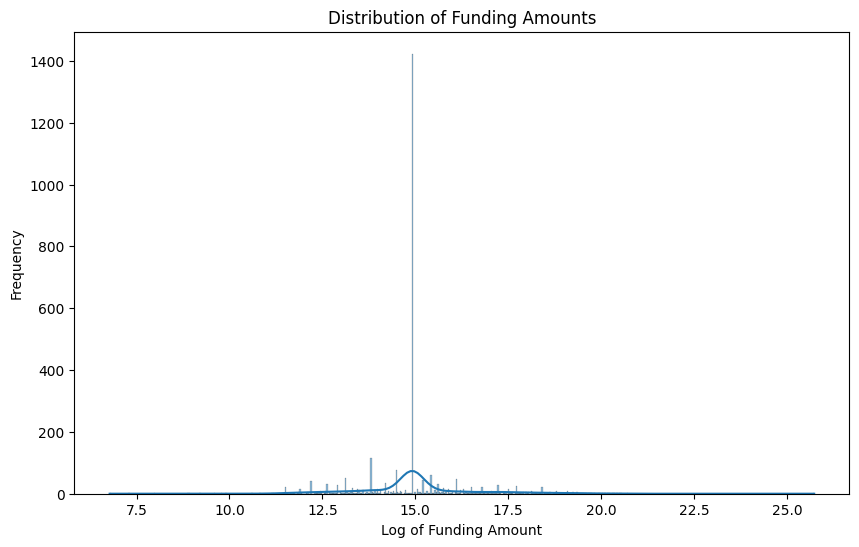

In [552]:

# Distribution of Funding Amounts with log transformation
plt.figure(figsize=(10, 6))
# Apply log transformation to the 'Fund_Amount' column to handle skewness
log_fund_amount = np.log1p(combined21_18['Fund_Amount'])

sns.histplot(log_fund_amount, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Log of Funding Amount')
plt.ylabel('Frequency')
plt.show()


#### What did we get from visualizing the funding amount?
The distribution was right-skewed, indicating a few very high funding amounts.

Applying a log transformation provided a clearer view of the distribution, helping to normalize the data for better analysis.

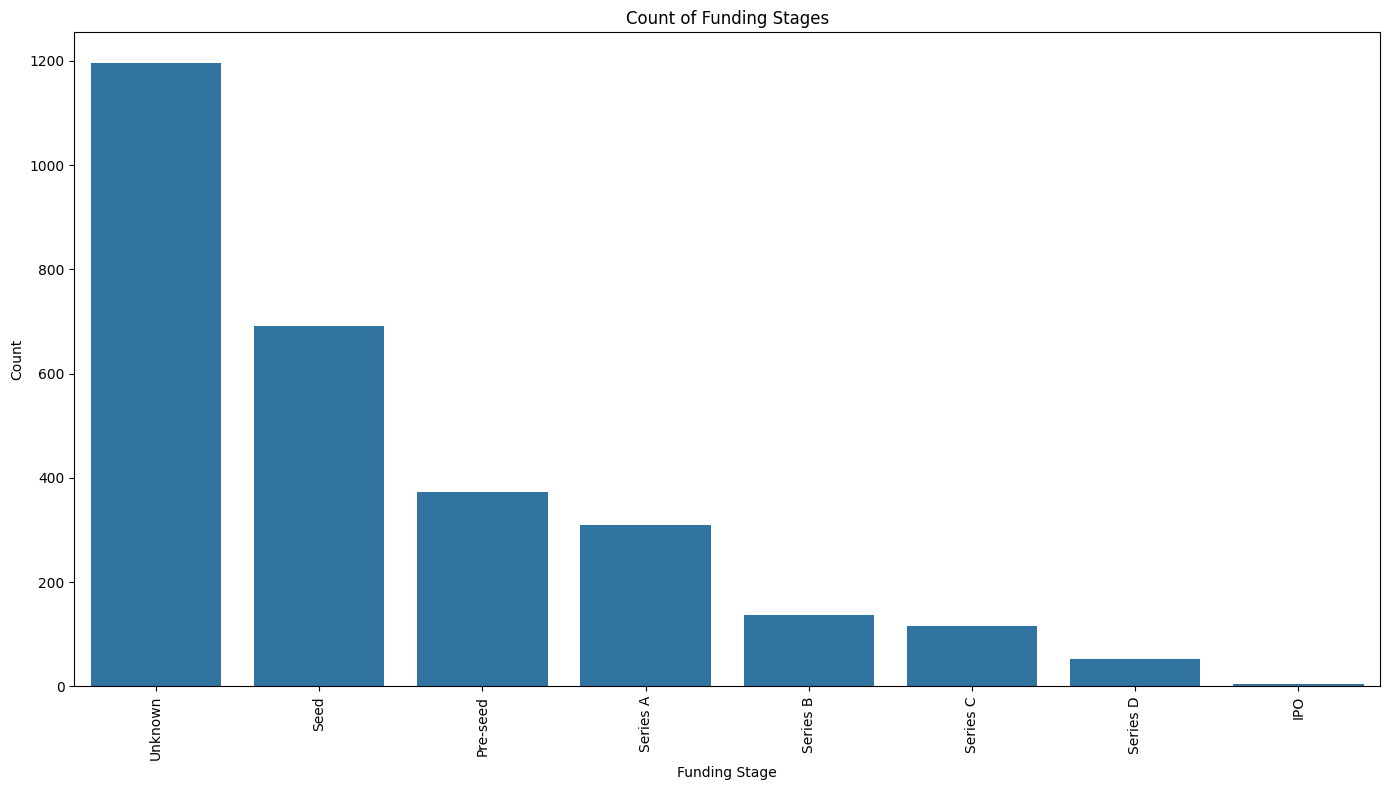

In [540]:
# Count plot for Funding Stages
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.countplot(data=combined21_18, x='Stage', order=combined21_18['Stage'].value_counts().index)
plt.title('Count of Funding Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


#### What did we get from visualizing the funding stage ?

The purpose of this analysis is to visualize the distribution of startups across different funding stages. 

The plot reveals which funding stages (e.g., Seed, Series A) are most prevalent among the startups.

It helps in understanding the startup ecosystem's maturity, identifying trends, and making data-driven decisions for investment and support strategies.

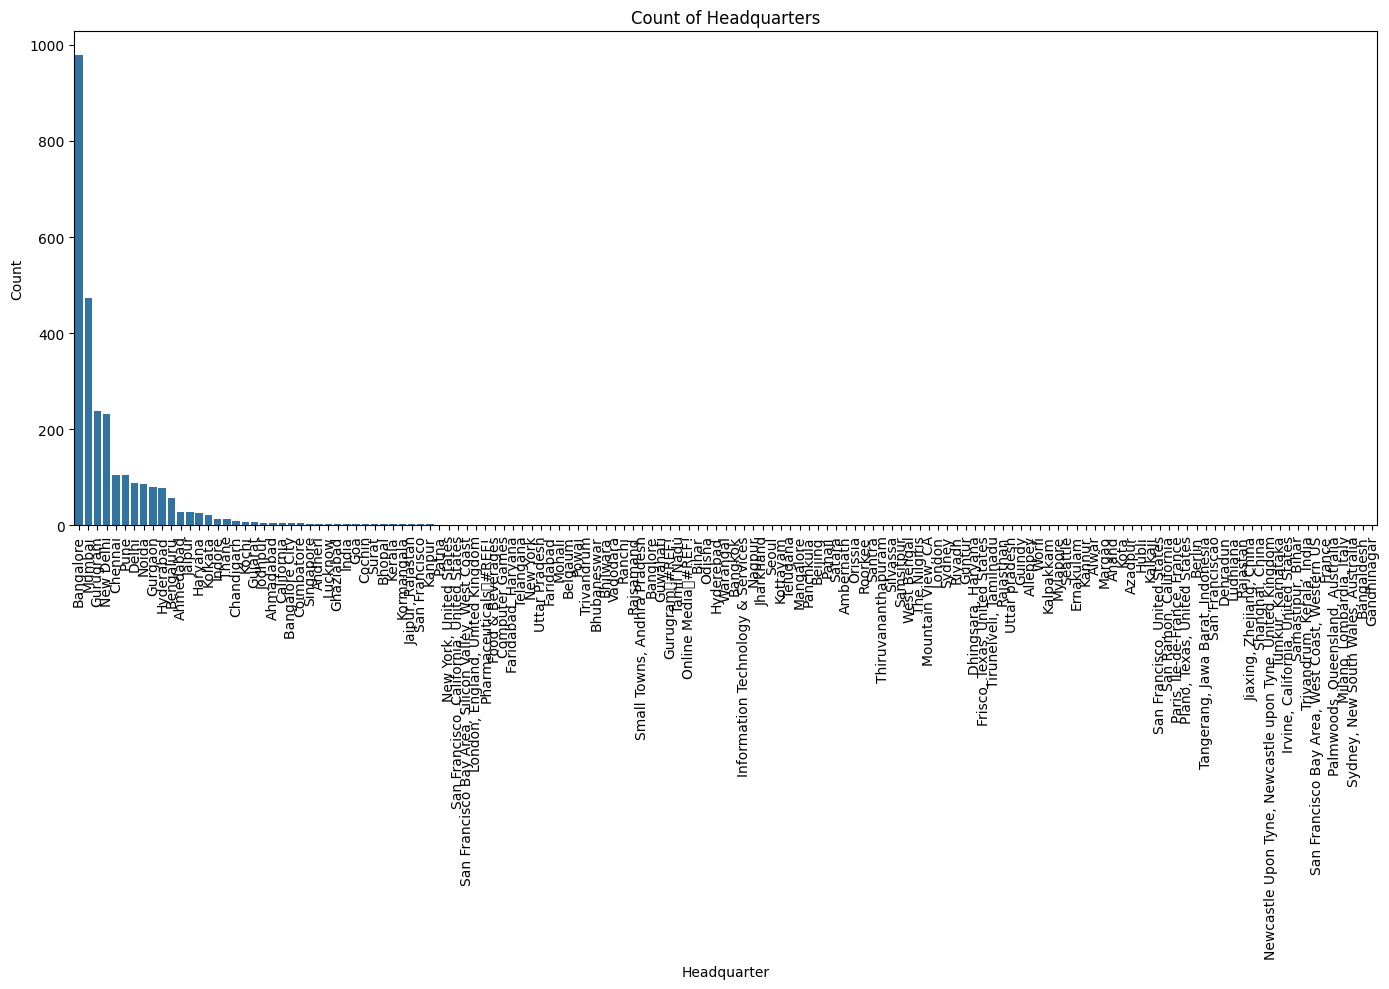

In [541]:
# Count plot for aggregated Headquarters
plt.figure(figsize=(14, 10))  # Increase figure size
sns.countplot(data=combined21_18, x='HeadQuarter', order=combined21_18['HeadQuarter'].value_counts().index)
plt.title('Count of Headquarters')
plt.xlabel('Headquarter')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



#### What do we get from visualizing the distribution of startups across different headquarters 
providing valuable insights into the geographical distribution of startups. By aggregating less frequent categories, the plot becomes more focused and easier to interpret, highlighting the major startup hubs in India. 
This information is crucial for stakeholders to understand regional trends and make informed decisions regarding investments and support strategies.

# Hypothesis Testing

In [542]:
# Group by HeadQuarter and get the funding amounts
funding_groups = [group['Fund_Amount'].values for name, group in combined21_18.groupby('HeadQuarter')]

# Perform ANOVA
anova_result = f_oneway(*funding_groups)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: No significant difference in funding amounts across different headquarters.")
else:
    print("Fail to reject the null hypothesis: There is a significant difference in funding amounts across different headquarters.")


ANOVA result: F-statistic = 0.034601167939555554, p-value = 0.9999999999999999
Fail to reject the null hypothesis: There is a significant difference in funding amounts across different headquarters.


# Data Visualization

#### Top 10 Headquarters by Funding Amount

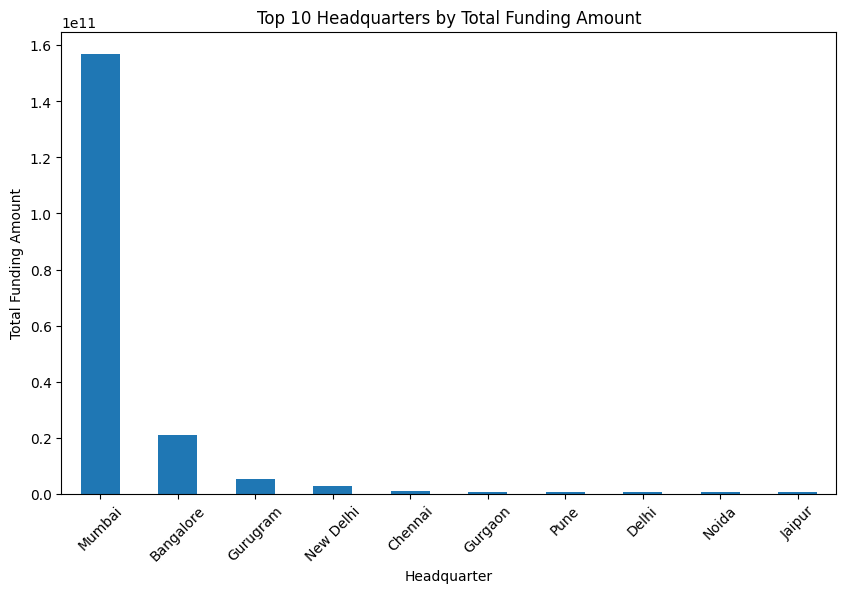

In [543]:
top_headquarters = combined21_18.groupby('HeadQuarter')['Fund_Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_headquarters.plot(kind='bar')
plt.title('Top 10 Headquarters by Total Funding Amount')
plt.xlabel('Headquarter')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()



# Answering the questions asked 

#### 1.How has funding to startups changed over the period of time?

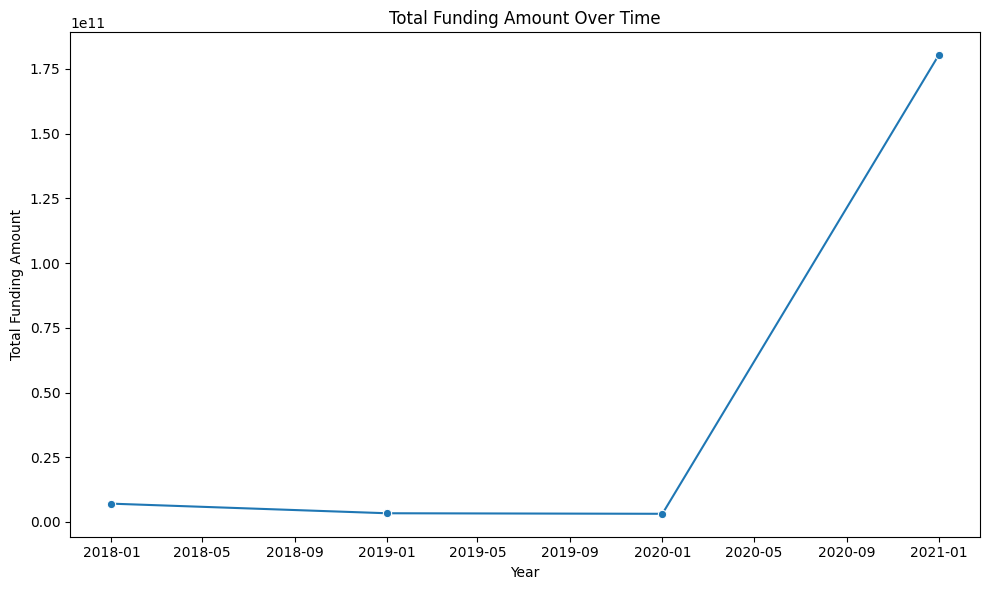

In [551]:
# First change the datatype of the Funding year.
combined21_18["Funding_Year"] = pd.to_datetime(combined21_18["Funding_Year"], format='%Y')

# Group by 'Funding_Year' and calculate the total funding amount per year
funding_by_year = combined21_18.groupby('Funding_Year')['Fund_Amount'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=funding_by_year, x='Funding_Year', y='Fund_Amount', marker='o')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(False)  # Remove the gridlines
plt.tight_layout()
plt.show()


#### 2.What is the average amount of funding for start-ups in 2019 and 2021?


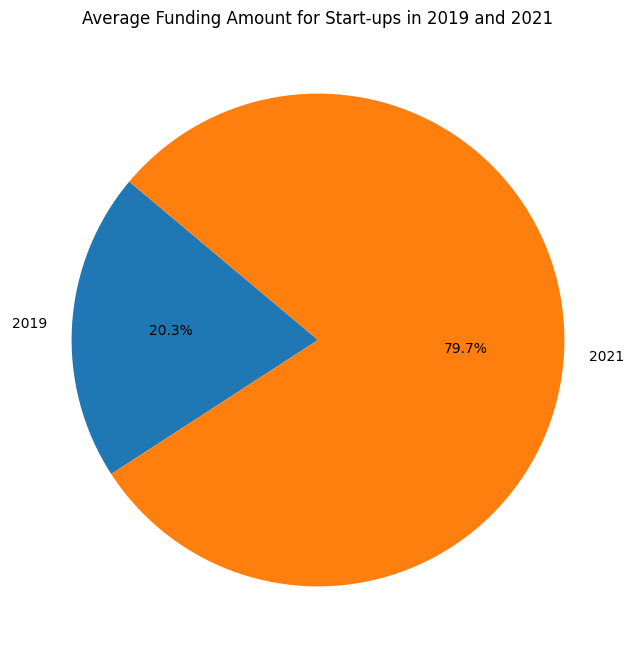

In [545]:
# Convert the Funding_Year column to datetime and extract the year
combined21_18['Funding_Year'] = pd.to_datetime(combined21_18['Funding_Year']).dt.year

# Filter the data for the years 2019 and 2021
filtered_data = combined21_18[combined21_18['Funding_Year'].isin([2019, 2021])]

# Calculate the average funding amount for each year
average_funding = filtered_data.groupby('Funding_Year')['Fund_Amount'].mean().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_funding['Fund_Amount'], labels=average_funding['Funding_Year'], autopct='%1.1f%%', startangle=140)
plt.title('Average Funding Amount for Start-ups in 2019 and 2021')
plt.show()


#### 3.Which headquarter is the most preferred startup location?


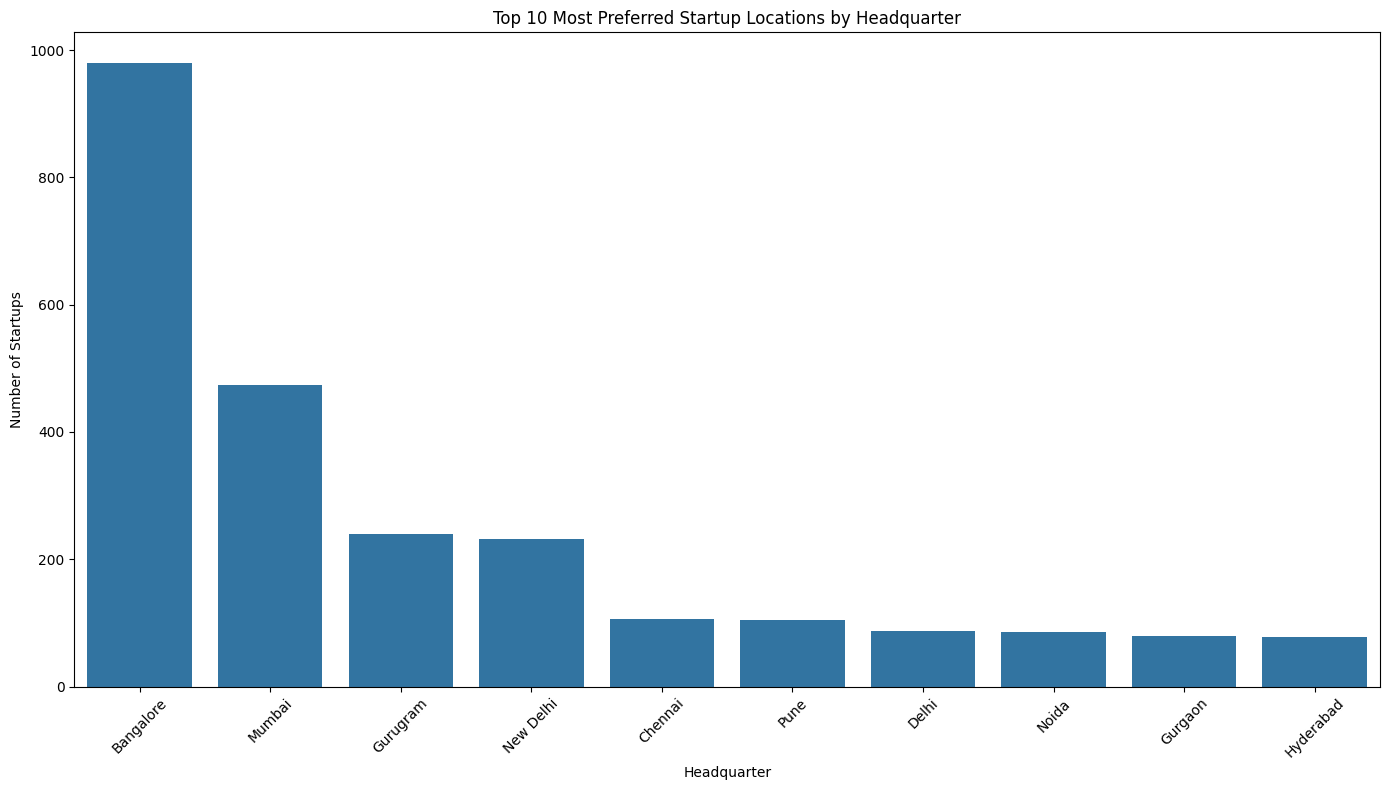

In [547]:
# Count the number of startups by headquarter
headquarter_counts = combined21_18['HeadQuarter'].value_counts().reset_index()
headquarter_counts.columns = ['HeadQuarter', 'Count']

# Filter to top 10 headquarters
top_10_headquarters = headquarter_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_headquarters, x='HeadQuarter', y='Count')
plt.title('Top 10 Most Preferred Startup Locations by Headquarter')
plt.xlabel('Headquarter')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### 4.Which sectors are most favored by investors?


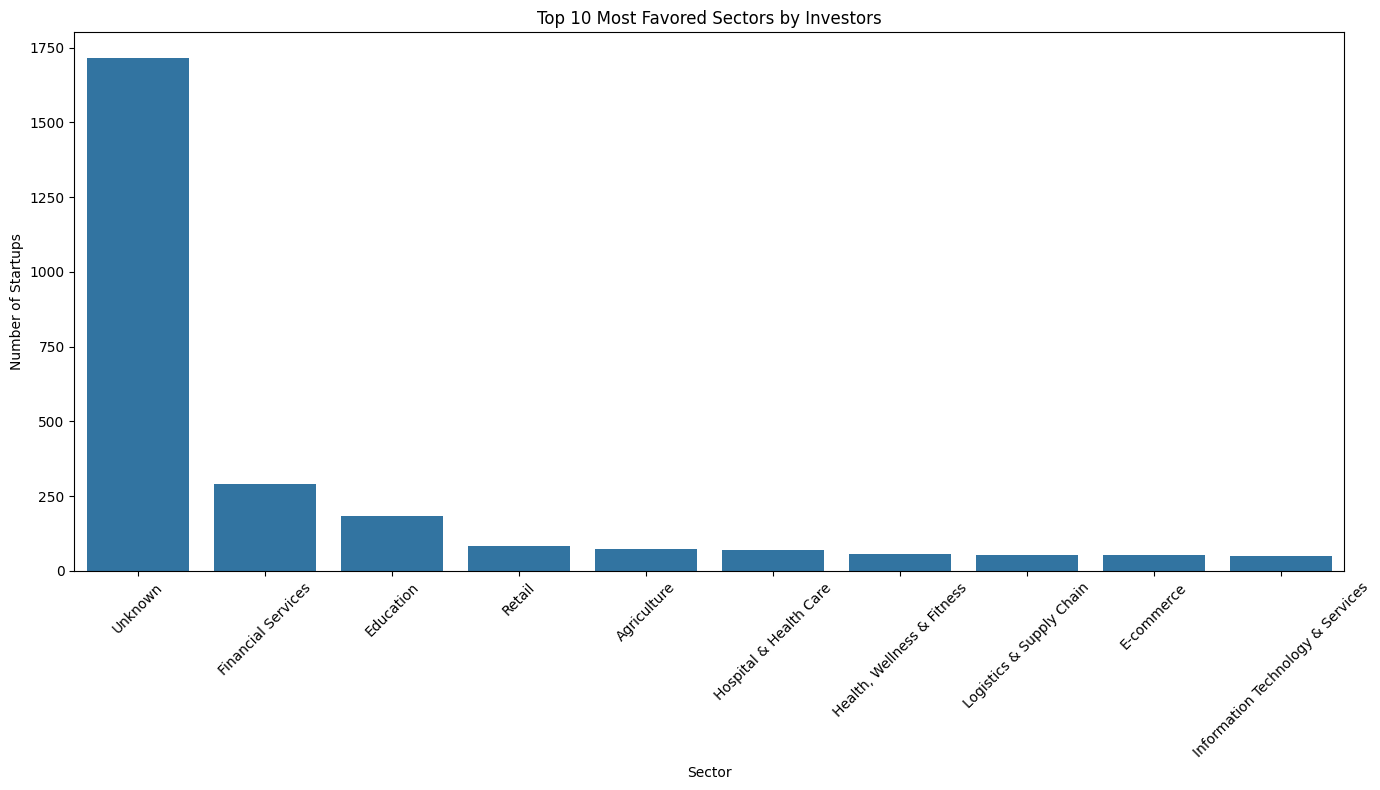

In [548]:
# Count the number of startups by sector
sector_counts = combined21_18['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']

# Filter to top 10 sectors
top_10_sectors = sector_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_sectors, x='Sector', y='Count')
plt.title('Top 10 Most Favored Sectors by Investors')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### 5.What are the most common funding stages among indian startups?

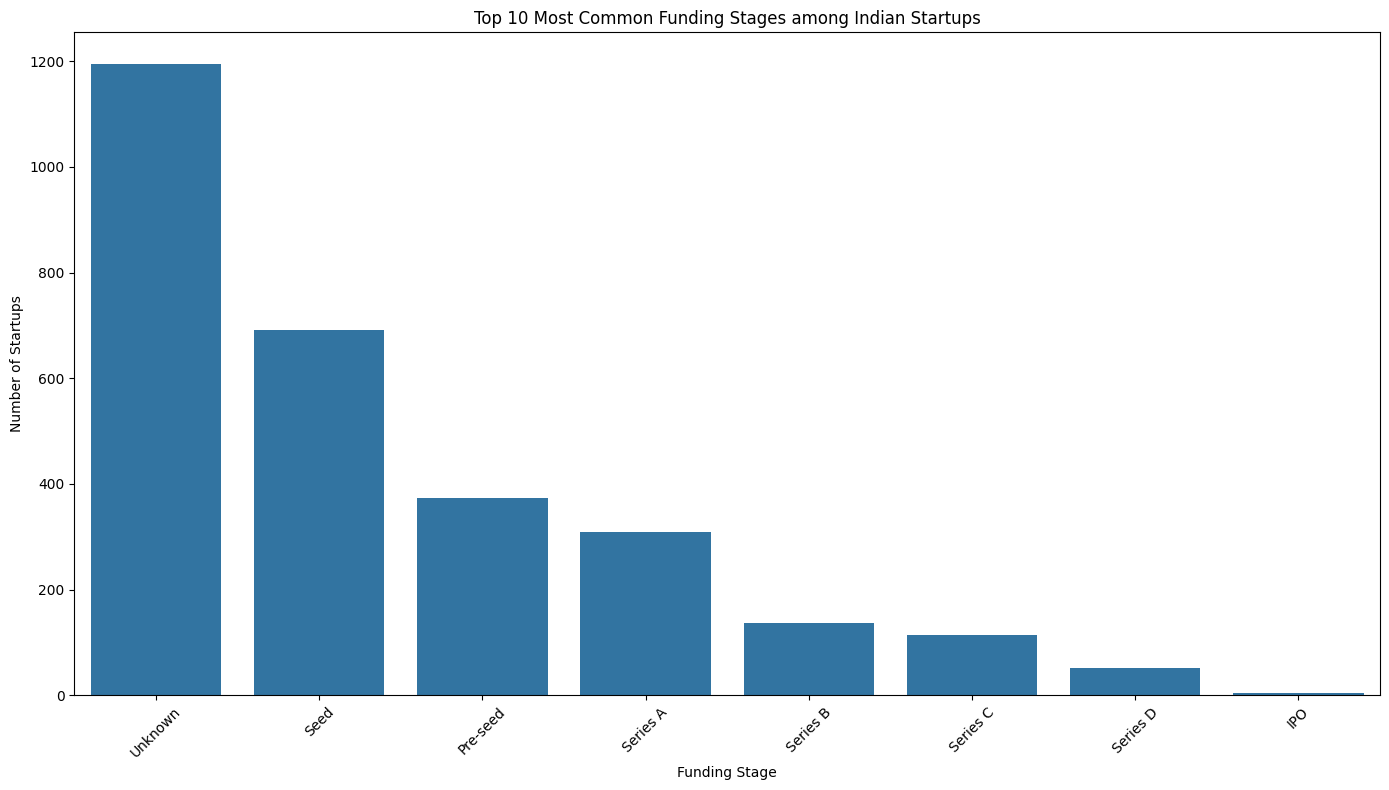

In [549]:
# Count the number of startups by funding stage
stage_counts = combined21_18['Stage'].value_counts().reset_index()
stage_counts.columns = ['Stage', 'Count']

# Filter to top 10 funding stages
top_10_stages = stage_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_stages, x='Stage', y='Count')
plt.title('Top 10 Most Common Funding Stages among Indian Startups')
plt.xlabel('Funding Stage')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
